# Homework 8: Decision Tree Classification and Visualization

In [1]:
from sklearn.datasets import load_wine
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import otter
grader = otter.Notebook()
import random
import copy

# Set random seeds for reproducibility of random operations!
np.random.seed(42)
random.seed(42)

In [2]:
# First we load the wine dataset.
data = load_wine()

# Problem 1
## Put the data into a dataframe and visualize it

In [3]:
df = pd.DataFrame(data= np.c_[data.data, data.target], columns= data.feature_names + ['target'])
print(df.head(5))
grader.check('q1')

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0             

All tests passed!

# Problem 2
## Create a decision tree classifer for this data.
## Note: For all problems, set the random_state to 42 in the train_test_split method, and use a train test split of 85/15.

Test Accuracy:  0.9259259259259259


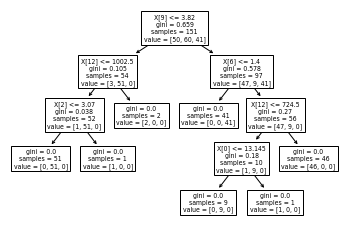

All tests passed!

In [4]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:13]
Y = df.iloc[:, 13]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train) 
score = clf.score(x_test, y_test)   
print('Test Accuracy: ', score)
sklearn.tree.plot_tree(clf)
plt.show()
grader.check('q2')


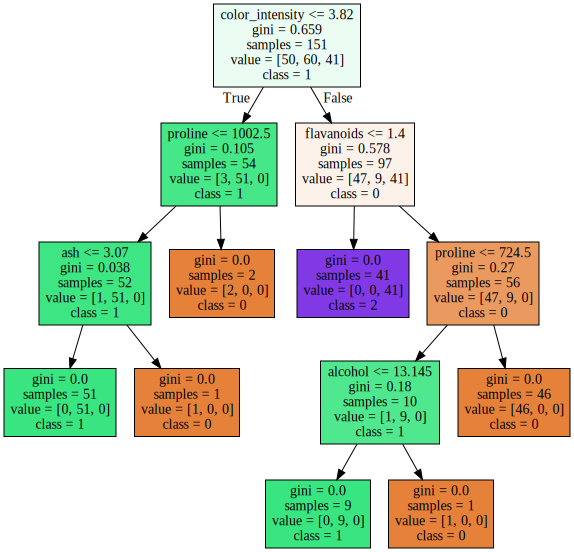

In [5]:
# Note that this tree is hard to read. So we're going to display it in a better way with graphviz.
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=data.feature_names, class_names=['0', '1', '2'], filled = True))
display(SVG(graph.pipe(format='svg')))

# Problem 3
## Create a decision tree classifer that splits based on the entropy criterion, rather than the Gini coefficient.

Test Accuracy:  0.8888888888888888


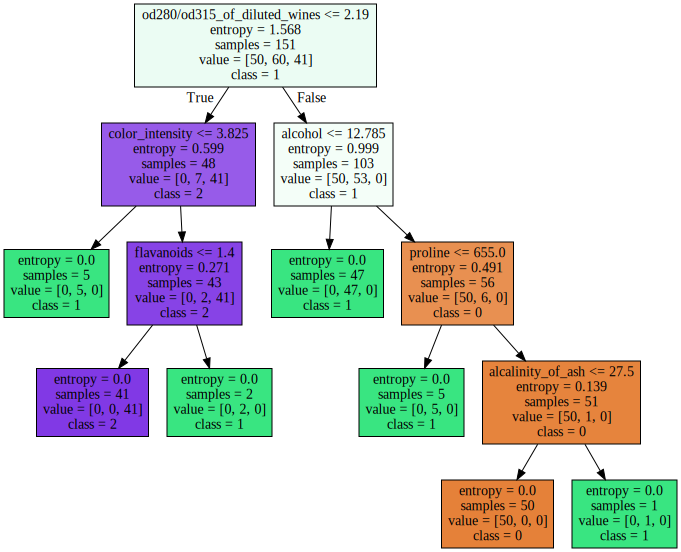

All tests passed!

In [6]:
clf2 = tree.DecisionTreeClassifier(criterion='entropy')
clf2.fit(x_train, y_train)
score = clf2.score(x_test, y_test)
print('Test Accuracy: ', score)

graph = Source(tree.export_graphviz(clf2, out_file=None, feature_names=data.feature_names, class_names=['0', '1', '2'], filled = True))
display(SVG(graph.pipe(format='svg')))

grader.check('q3')

# Problem 4
## Remove the feature at the root of the decision tree, and create a new classifier based on this new feature set. Compare the accuracies between the two models.

In [7]:
del x_train['od280/od315_of_diluted_wines']
del x_test['od280/od315_of_diluted_wines']

In [8]:
clf3 = tree.DecisionTreeClassifier(criterion='entropy')
clf3.fit(x_train, y_train)
score = clf3.score(x_test, y_test)
print('Test Accuracy: ', score)
grader.check('q4a')

Test Accuracy:  0.9629629629629629


All tests passed!

# Problem 4b
## Remove the 'hue' feature (which should be a leave of your tree), and create a new classifier based on this new feature set. Compare the accuracies between the two models.

In [9]:
X = df.iloc[:, 0:13]
Y = df.iloc[:, 13]

del X['hue']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [10]:
clf4 = tree.DecisionTreeClassifier(criterion='entropy')
clf4.fit(x_train, y_train)
score = clf4.score(x_test, y_test)

print('Test Accuracy: ', score)

grader.check('q4b')

Test Accuracy:  0.8888888888888888


All tests passed!

# Problem 5

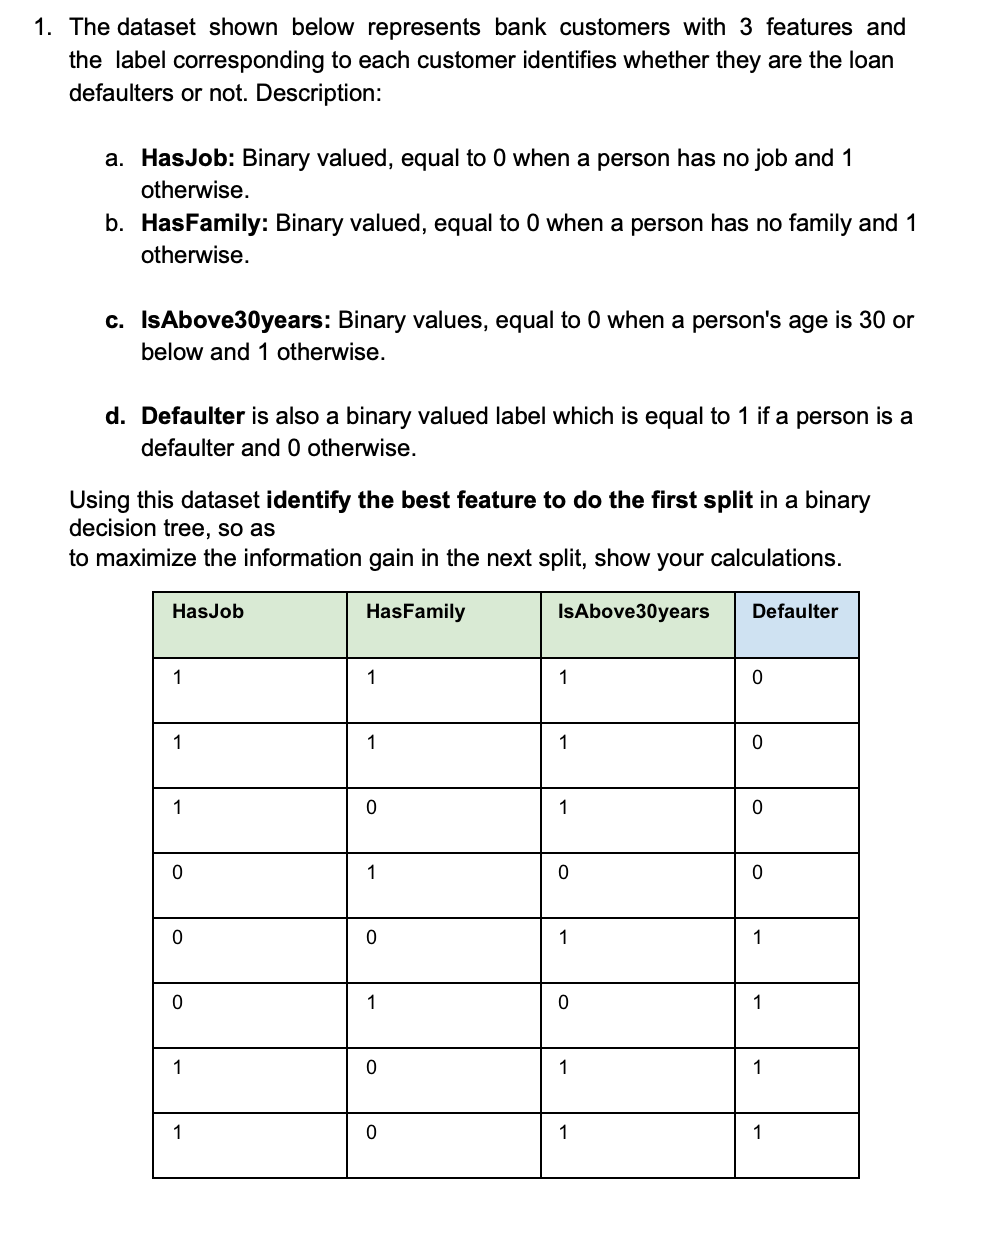

In [11]:
df0 = df.copy()
del df0['od280/od315_of_diluted_wines']
del df0['target']

In [12]:
# Store the feature in the variable below:
bestfeature = list(df0.columns)

# Problem 6
## Entropy

Suppose there are three symbols A, B, and C, where are emitted with probability P(A)=.7, P(B)=.2, P(C)=.1. For example the string 'BAC' has probability .7*.2*.1=.014. If this process emits another symbol, 'BAC?', what is the entropy of that symbol?

In [13]:
# Store in the variable below:
p = 0.014
entropy = -p*np.log2(p) - (1-p)*np.log2(1-p)